# Data Story: College Scorecard and Post-Graduate Success
by James Catterall

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

This capstone project is investigating post-collegiate outcomes for students based on data from the US Department of Education's College Scorecard on the colleges they went to. For the Data Story portion of the project, some of the questions that we will be asking include:
* In which states/territories is public college the most expensive? In which states/territories is it the least expensive?
* What is the budgetary situation with each school?
 * How much do teachers earn, depending on the type of college they teach at?
 * What schools spend the most/least money on their students?
* How well do students do financially once they leave college, in terms of earnings and debt? Which college has the most or least financially successful students? Are students from certain universities more likely to default on their debt? 

## Reading in the Data

In [149]:
cleaned=pd.read_csv('2014_cleaned.csv', dtype={'zip':'category'})
for column in [col for col in cleaned if 'bach' in col]:
    cleaned[column]=cleaned[column].astype('category')
for column in ['open_admissions_policy','zip','region_id','ownership','online_only','id']:
    cleaned[column]=cleaned[column].astype('category')

### Initial look at data
We first take a look at which columns are available in the dataset, as well as the numerical correlations of some of the columns. This helps with prompting questions and possible avenues for further data exploration. 

In [18]:
for i in cleaned.columns:
    if not i.startswith('bach'):
        print(i)

id
name
city
state
zip
region_id
ownership
online_only
open_admissions_policy
1_yr_repay.overall_rate
6_yrs_AE.WNE.mean_earnings
tuition.in_state
tuition.out_of_state
tuition_revenue_per_fte
instructional_expenditure_per_fte
faculty_salary
pell_grant_rate
compl_rate_4yr_150nt
share_first.time_full.time
retention_rate.four_year.full_time
3_yr_default_rate
t_iv.withdrawn_by.3yrs
median_debt.overall


In [150]:
cleaned.corr()

,1_yr_repay.overall_rate,6_yrs_AE.WNE.mean_earnings,tuition.in_state,tuition.out_of_state,tuition_revenue_per_fte,instructional_expenditure_per_fte,faculty_salary,pell_grant_rate,compl_rate_4yr_150nt,share_first.time_full.time,retention_rate.four_year.full_time,3_yr_default_rate,t_iv.withdrawn_by.3yrs,median_debt.overall
1_yr_repay.overall_rate,1.000000,0.535206,0.478300,0.633445,0.330372,0.439927,0.557135,-0.792696,0.780463,0.549538,0.571802,-0.794617,-0.726844,0.473184
6_yrs_AE.WNE.mean_earnings,0.535206,1.000000,0.321320,0.427925,0.414242,0.508515,0.594776,-0.550201,0.516431,0.070978,0.195829,-0.578091,-0.327101,0.283696
tuition.in_state,0.478300,0.321320,1.000000,0.891654,0.764888,0.325640,0.332335,-0.459587,0.548982,0.432146,0.344530,-0.442256,-0.415534,0.563470
tuition.out_of_state,0.633445,0.427925,0.891654,1.000000,0.692427,0.439493,0.579985,-0.623202,0.695325,0.538685,0.505567,-0.572688,-0.574558,0.602202
tuition_revenue_per_fte,0.330372,0.414242,0.764888,0.692427,1.000000,0.385403,0.346361,-0.373936,0.485641,0.233811,0.205126,-0.352266,-0.234711,0.480921
instructional_expenditure_per_fte,0.439927,0.508515,0.325640,0.439493,0.385403,1.000000,0.532540,-0.390131,0.505527,0.339620,0.202276,-0.362633,-0.331223,0.161660
faculty_salary,0.557135,0.594776,0.332335,0.579985,0.346361,0.532540,1.000000,-0.557318,0.607024,0.363342,0.465709,-0.517939,-0.480287,0.302129
pell_grant_rate,-0.792696,-0.550201,-0.459587,-0.623202,-0.373936,-0.390131,-0.557318,1.000000,-0.680401,-0.400269,-0.511281,0.720000,0.564620,-0.414527
compl_rate_4yr_150nt,0.780463,0.516431,0.548982,0.695325,0.485641,0.505527,0.607024,-0.680401,1.000000,0.512646,0.574748,-0.696386,-0.685002,0.541133
share_first.time_full.time,0.549538,0.070978,0.432146,0.538685,0.233811,0.339620,0.363342,-0.400269,0.512646,1.000000,0.478656,-0.274377,-0.600658,0.390162


Right away there are correlations that show up which may be interesting to investigate further. One of them is the correlation between the proportion of students who complete within 6 years at a school (`compl_rate_4yr_150nt`) and the proportion of students whose student loan balances are declining 1 year after leaving college (`1_yr_repay.overall_rate`).  Another surprising correlation is the one between average faculty salary at a college and the mean earnings of students 6 years after entering the labor force (`6_yrs_AE.WNE.mean_earnings`). We will explore both of these in more detail with visualizations, but first we will look at other topics to get a better understanding of the data.

## School Cost
We begin by looking into the overall picture of college affordability. The variable we will be paying attention to is `tuition.in_state`, which is the cost of tuition and fees for a college for students attending in the same state they reside in. This is before financial aid is applied for individual students. 

In our first set of graphs, we look at the average tuition cost of public universities by the state or territory they are in. 

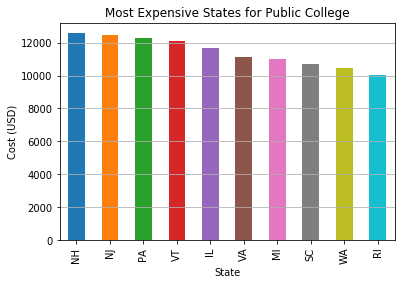

In [163]:
# Which states have the highest in-state tuition for public college?
#[need to figure out how to add values to bars]
cleaned[cleaned['ownership']==1
       ].groupby('state')['tuition.in_state'].mean().sort_values(ascending=False)[:10].plot(
    kind='bar', title='Most Expensive States for Public College')
plt.grid(axis='y')
plt.xlabel('State')
plt.ylabel('Cost (USD)')
plt.show()

Of the 10 most expensive states for public college, 5 of them are in the greater Northeast region (New Hampshire, New Jersey, Pennsylvania, Vermont, Rhode Island). Most of the states are also areas that have higher costs of living compared to the rest of the country. 

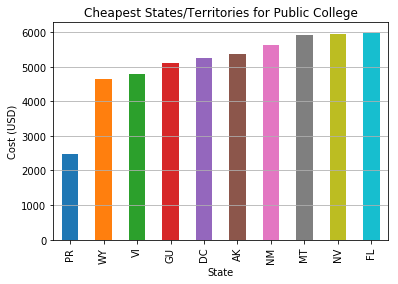

In [140]:
cleaned[cleaned['ownership']==1].groupby('state')['tuition.in_state'].mean().sort_values()[:10].plot(
    kind='bar', title='Cheapest States/Territories for Public College')
plt.grid(axis='y')
plt.xlabel('State')
plt.ylabel('Cost (USD)')
plt.show()

By far the cheapest subnational entity in the U.S. for public postsecondary education is Puerto Rico, which has a mean tuition of around \\$2,500. The cheapest of the 50 states is Wyoming, which is around \\$4,700. It is also the only U.S. state to be listed as one of the five cheapest subnational entities for public college, as three of the others (Puerto Rico, Virgin Islands, and Guam) are insular areas of the US and one (Washington, D.C.) is a federal district. 

We now look at the costs of individual colleges: which schools have the highest tuition costs? Which are the least expensive? Again, this is before financial aid is applied.

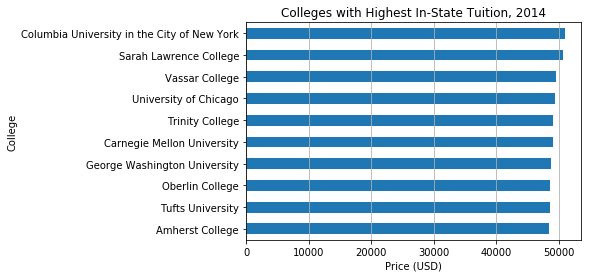

In [217]:
#Which colleges cost the most?
cleaned[['name','tuition.in_state']].sort_values(by="tuition.in_state").tail(10).set_index('name').plot(
    kind='barh',legend=None, title='Colleges with Highest In-State Tuition, 2014')
plt.xlabel('Price (USD)')
plt.ylabel('College')
plt.grid(axis='x')
plt.show()

One thing to note here is that all of the colleges listed here are privately owned and predominantly in the Northeast or Mid-Atlantic region of the United States. 

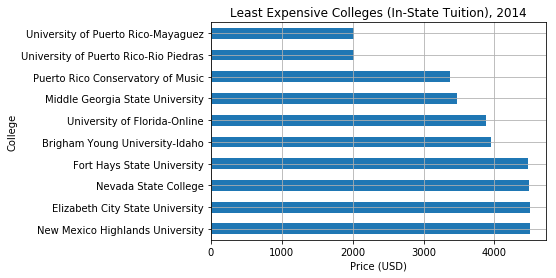

In [218]:
#what schools cost the least?
cleaned[['name','tuition.in_state']].sort_values(
    by="tuition.in_state",ascending=False).tail(10).set_index('name').plot(
    kind='barh',title='Least Expensive Colleges (In-State Tuition), 2014',legend=None)
plt.grid(True)
plt.xlabel('Price (USD)')
plt.ylabel('College')
plt.show()

Again, Puerto Rico has the three least expensive colleges - the in-state tuition fee for both of the University of Puerto Rico campuses in the list are $2,000, which is about 25 times cheaper than the most expensive school in the graph before this one.

## School Spending
Next, we will look at how schools spend their budget, both on an average per-student basis and in terms of average facutly salary.

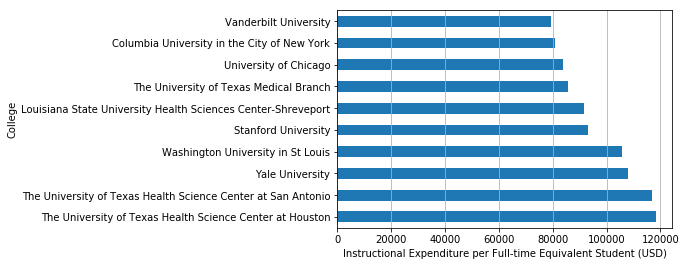

In [225]:
#what schools spend the most on students?
cleaned[['name','instructional_expenditure_per_fte']].sort_values(
    by="instructional_expenditure_per_fte",ascending=False).head(10).set_index('name').plot(
    kind='barh',legend=None)
plt.grid(axis='x')
plt.title('Colleges with Highest Spending per Student')
plt.xlabel('Instructional Expenditure per Full-time Equivalent Student (USD)')
plt.ylabel('College')
plt.show()

Four of the colleges that have the highest per-student spending have "Medical" or "Health" in their name. However, since the term "full-time equivalent student" includes graduate students as well, it's unclear whether this variable truly reflects the amount spend on undergraduate education, or if a disproportionate amount of money is spent on graduate research programs in comparison.

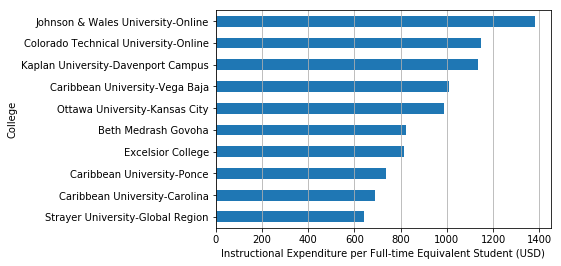

In [226]:
#what schools spend the least?
cleaned[['name','instructional_expenditure_per_fte']].sort_values(
    by="instructional_expenditure_per_fte").head(10).set_index('name').plot(
    kind='barh',legend=None)
plt.grid(axis='x')
plt.xlabel('Instructional Expenditure per Full-time Equivalent Student (USD)')
plt.ylabel('College')
plt.show()

Of note is that three of the colleges in this graph are online-only (which reduces the need to spend money on physical resources), three are in Puerto Rico, and three are for-profit. 

Finally, we look at teacher pay an dhow it compares between different types of universities.

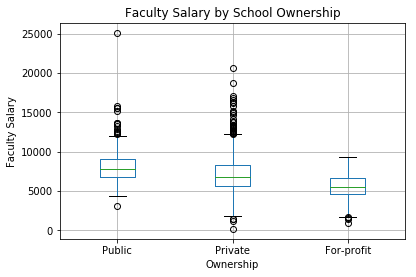

In [108]:
# How much are teachers paid? What kind of school is more profitable to work at?
cleaned.boxplot(column='faculty_salary', by='ownership')
plt.xticks(np.arange(start=1,stop=4), ('Public', 'Private', 'For-profit'))
plt.ylabel('Faculty Salary')
plt.suptitle('')
plt.title('Faculty Salary by School Ownership')
plt.xlabel('Ownership')
plt.show()

On average, publicly-owned colleges pay their faculty more than privately-owned colleges do, while for-profit colleges pay their faculty the least. 

## Post-Graduate Success
### Student Earnings (6 Years After Entry)

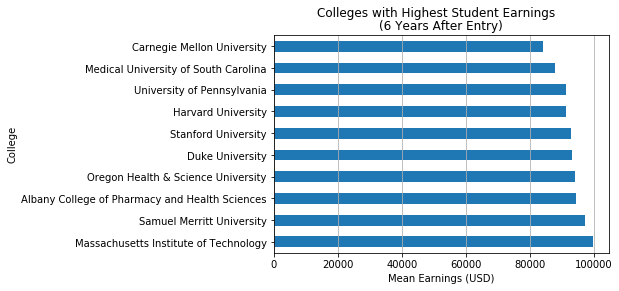

In [127]:
#what schools have the highest post-grad earnings?
cleaned[['name','6_yrs_AE.WNE.mean_earnings']].sort_values(
    by="6_yrs_AE.WNE.mean_earnings",ascending=False).head(10).set_index('name').plot(
    kind='barh',legend=False, title="(6 Years After Entry)")
plt.grid(axis='x')
plt.suptitle('Colleges with Highest Student Earnings')
plt.xlabel('Mean Earnings (USD)')
plt.ylabel('College')
plt.show()

The colleges included here are either large research institutions or medical schools. The latter makes sense, since the medical field is very lucrative. 

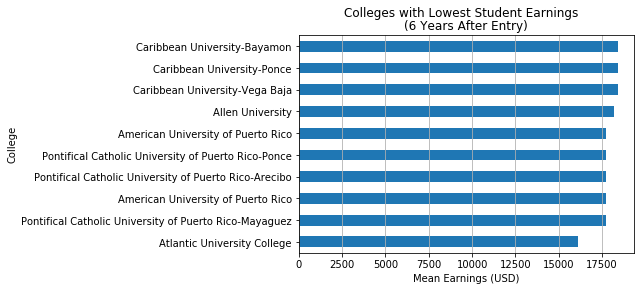

In [128]:
cleaned[['name','6_yrs_AE.WNE.mean_earnings']].sort_values(
    by="6_yrs_AE.WNE.mean_earnings").head(10).set_index('name').plot(
    kind='barh',legend=False, title="(6 Years After Entry)")
plt.grid(axis='x')
plt.suptitle('Colleges with Lowest Student Earnings')
plt.xlabel('Mean Earnings (USD)')
plt.ylabel('College')
plt.show()

\[American University of Puerto Rico is includeed in the graph twice because it has different campuses.\]

Out of the 10 colleges with the lowest post-graduate earnings, all but one of them (Allen University) are located in Puerto Rico.

Finally, I decided to look at a correlation from earlier that caught my eye: faculty salary vs mean earnings 6 years after entering the labor force.

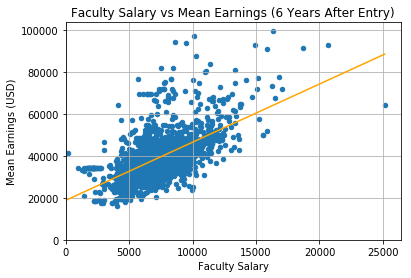

In [231]:
# Is there really a correlation between faculty salary and post-grad earnings?
cleaned.plot(kind='scatter', x='faculty_salary', y='6_yrs_AE.WNE.mean_earnings')
plt.xlabel('Faculty Salary')
plt.ylabel('Mean Earnings (USD)')
plt.title('Faculty Salary vs Mean Earnings (6 Years After Entry)')
a, b = np.polyfit(cleaned['faculty_salary'],cleaned['6_yrs_AE.WNE.mean_earnings'],1)
x_theor = np.array([0, max(cleaned['faculty_salary'])])
y_theor= a*x_theor+b
plt.plot(x_theor,y_theor,color='orange')
plt.grid(True)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()


There appears to be a significant correlation between faculty salary and mean earnings, especially between $0 and $15,000 on the x-axis. Further investigation might be useful to determine whether the cause of this correlation is an actual link between how much teachers are paid and how much their students earn, or a confounding variable which influences both variables.

### Student Default Rates by School Ownership

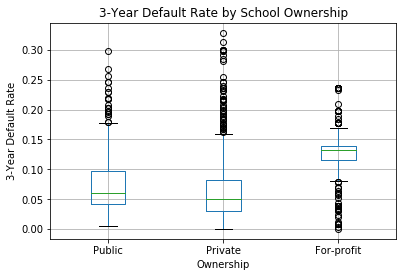

In [169]:
cleaned.boxplot(column='3_yr_default_rate', by='ownership')
plt.xticks(np.arange(start=1,stop=4), ('Public', 'Private', 'For-profit'))
plt.ylabel('3-Year Default Rate')
plt.suptitle('')
plt.title('3-Year Default Rate by School Ownership')
plt.xlabel('Ownership')
plt.show()

Although there are a few public and private colleges with significantly higher default rates than average, for-profit colleges have a significantly higher default rate on average at around 0.13. The interquartile range of the boxplot in the for-profit column contains only values which are greater than 0.10. In comparison, the public and private columns' interquartile ranges are all below 0.10.

### Completion Rate vs Repayment Rate
Our final graph is a scatterplot of the 150% completion rate at each school versus the percentage of students who have repaid at least part of their debt one year after leaving school and are not in default.  

Text(0.5,1,'150% Completion Rate vs 1-Year Partial Repayment Rate')

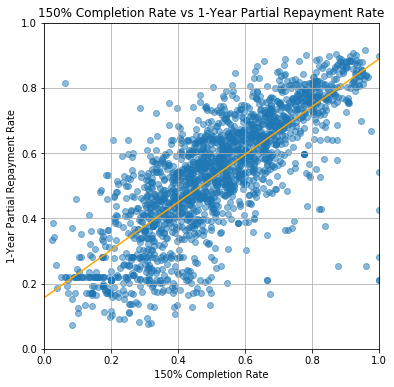

In [208]:
# Is there a correlation between 150% completion rate and repay rate?
subplot=cleaned[(cleaned['compl_rate_4yr_150nt'].notnull()) & (cleaned['1_yr_repay.overall_rate'].notnull())][[
    'compl_rate_4yr_150nt','1_yr_repay.overall_rate'
]]

a, b = np.polyfit(subplot['compl_rate_4yr_150nt'],subplot['1_yr_repay.overall_rate'],1)
x_theor = np.array([0, 1])
y_theor= a*x_theor+b

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(subplot['compl_rate_4yr_150nt'], subplot['1_yr_repay.overall_rate'], alpha=0.5)
ax.plot(x_theor,y_theor,color='orange')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel('150% Completion Rate')
ax.set_ylabel('1-Year Partial Repayment Rate')
ax.grid(True)
ax.set_title('150% Completion Rate vs 1-Year Partial Repayment Rate')

This scatterplot suggests a strong correlation between completion rate and repayment of student debt. Intuitively this makes sense - students who complete their education and receive their degrees are more likely to find well-paying jobs than those who don't graduate, which makes it easier to pay off student loan debt. Of interest are some of the outliers - such as one school with a 0.2 repayment rate and a completion rate of 1, and another with a completion rate less than 0.1 and a repayment rate above 0.8. What might be causing those outliers is a possible topic that could be explored further. 

## Further Areas for Exploration
* How does the average cost of public college compare with the average cost of living in each of the states?  
* How does the cost of public college in each state compare with the amount of funding the public educational system provided by the state budget?
* Is there an actual link between faculty salary and post-graduation earnings? Or is there something else correlated with both variables?